<a href="https://colab.research.google.com/github/var-github/ACM_ML/blob/main/ML_cracked_wall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
data_path = kagglehub.dataset_download('aniruddhsharma/structural-defects-network-concrete-crack-images')
print('Data source import complete.')

Data source import complete.


In [12]:
from google.colab import files
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [3]:
Data = []
Labels = []
data_path = data_path + '/Walls'

directory = data_path + '/Cracked'
Labels += [1]*len(os.listdir(directory))
for name in os.listdir(directory):
    img = cv2.imread(os.path.join(directory, name))
    Data.append(img)

directory = data_path + '/Non-cracked'
Labels += [0]*len(os.listdir(directory))
for name in os.listdir(directory):
    img = cv2.imread(os.path.join(directory, name))
    Data.append(img)

In [4]:
Data = np.array(Data)
Labels = np.array(Labels)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(Data, Labels, shuffle=True)
del Data, Labels

> We have 14287 images of non cracked walls and 3851 images of cracked walls, due to huge imbalance in the classes we are normalising them by assigning higer weight to the minority class



In [ ]:
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

In [ ]:
model = models.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.save('cracked_wall_cnn.keras')

In [13]:
model = tf.keras.models.load_model('cracked_wall_cnn.keras')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model{epoch:03d}.keras', save_freq='epoch')
model.fit(x_train, y_train, epochs=30, class_weight=class_weights, batch_size=64, validation_split=0.2, callbacks=[checkpoint])
model.save('cracked_wall_cnn.keras')
files.download('cracked_wall_cnn.keras')

Epoch 1/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 33s 155ms/step - accuracy: 0.4965 - loss: 344.6762 - val_accuracy: 0.7097 - val_loss: 0.6828
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.7462 - loss: 0.9335 - val_accuracy: 0.6777 - val_loss: 0.7046
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step - accuracy: 0.7968 - loss: 0.5263 - val_accuracy: 0.6766 - val_loss: 0.7625
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 51s 215ms/step - accuracy: 0.8404 - loss: 0.4050 - val_accuracy: 0.6718 - val_loss: 0.9300
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 0.9013 - loss: 0.3082 - val_accuracy: 0.6711 - val_loss: 0.9976
Epoch 6/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 39s 216ms/step - accuracy: 0.8972 - loss: 0.2648 - val_accuracy: 0.6832 - val_loss: 1.2337
Epoch 7/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 35s 204ms/step - accuracy: 0.9433 - loss: 0.1961 - val_accuracy: 0.5939 - val_loss: 1.4082
Epoch 8/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 49s 252ms/step - accuracy: 0.8711 - loss:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> Epoch 29 showed best results - so we will be using the results of epoch 29 henceforth

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=64)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.8708 - loss: 0.7336
Test Loss: 0.8011
Test Accuracy: 0.8679


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


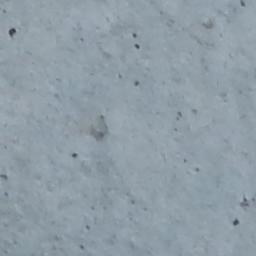

True nature: not cracked
Prediction: not cracked 



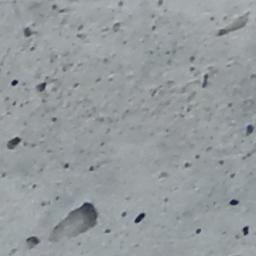

True nature: not cracked
Prediction: not cracked 



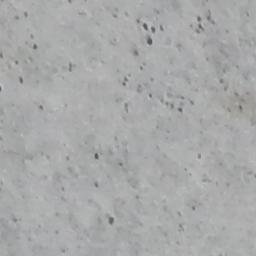

True nature: not cracked
Prediction: not cracked 



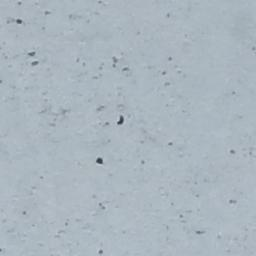

True nature: not cracked
Prediction: not cracked 



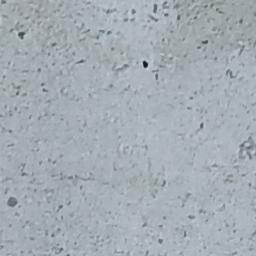

True nature: not cracked
Prediction: not cracked 



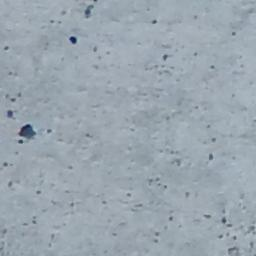

True nature: not cracked
Prediction: not cracked 



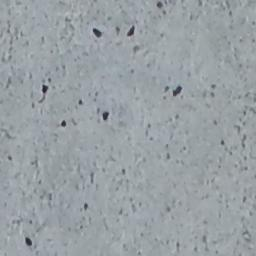

True nature: not cracked
Prediction: not cracked 



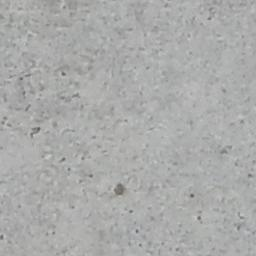

True nature: not cracked
Prediction: not cracked 



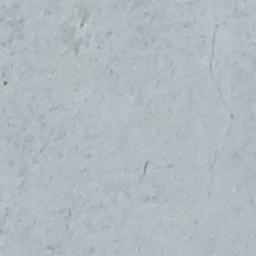

True nature: cracked
Prediction: cracked 



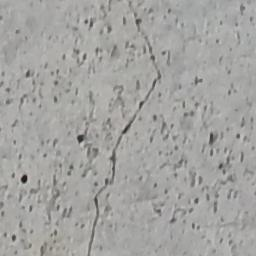

True nature: cracked
Prediction: cracked 



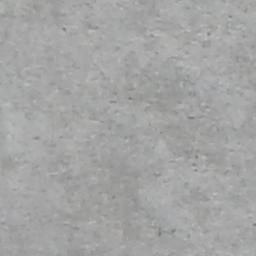

True nature: not cracked
Prediction: not cracked 



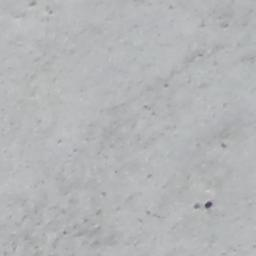

True nature: not cracked
Prediction: not cracked 



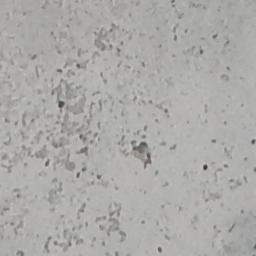

True nature: not cracked
Prediction: not cracked 



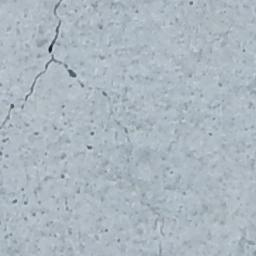

True nature: cracked
Prediction: cracked 



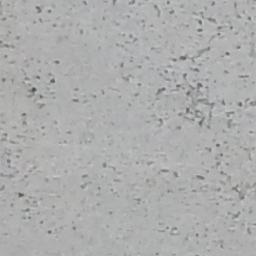

True nature: not cracked
Prediction: not cracked 



In [10]:
d = {1: "cracked", 0: "not cracked"}
predictions = model.predict(np.array(x_train[:15])).tolist()
i = 0
while i < len(predictions):
    if predictions[i][0] >= 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
    i += 1


for i in range(15):
    cv2_imshow(x_train[i])
    print("True nature:", d[y_train[i]])
    print("Prediction:", d[predictions[i]], "\n")